**Part 1**

C:\Users\talya\AppData\Local\Temp\ipykernel_9200\283708.py:10: RuntimeWarning: divide by zero encountered in divide
  P = -(G*M)/r


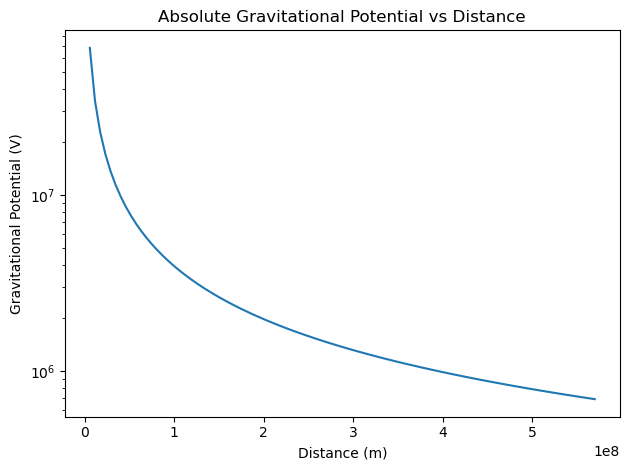

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def grav(xm, ym, x,y):
   r = np.sqrt((xm - x)**2 +(ym-y)**2)
   G = 6.67e-11
   M = 5.9e24 
   P = -(G*M)/r
   Potential = np.where(r<=0, np.nan, P)
   return Potential 
d = (3.8e8)    
x = np.linspace(0, d*1.5, 100)
G = np.abs(grav(0,0, x, 0)) 

fig, grav = plt.subplots()




grav.plot(x,G)
grav.set_xlabel("Distance (m)")
grav.set_ylabel("Gravitational Potential (V)")
grav.set_yscale('log')
grav.set_title("Absolute Gravitational Potential vs Distance")
fig.tight_layout()



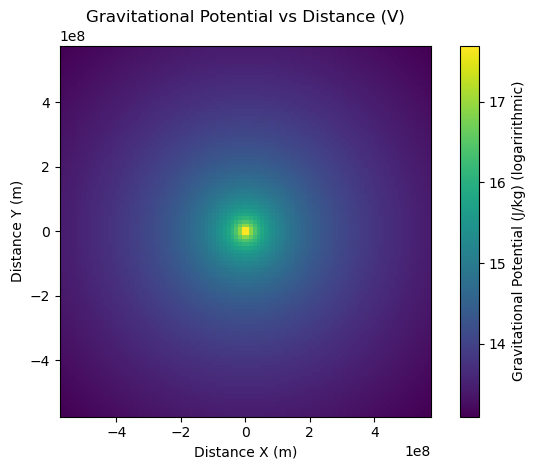

In [2]:
def grav(xm, ym, x,y):
   r = np.sqrt((xm - x)**2 +(ym-y)**2)
   G = 6.67e-11
   M = 5.9e24 
   P = -(G*M)/r
   Potential = np.where(r==0, np.nan, P)
   return Potential 

d = (3.8e8)    
x_grid = np.linspace(-1.5*d, 1.5*d, 100)
y_grid = np.linspace(-1.5*d, 1.5*d, 100)
X, Y = np.meshgrid(x_grid,y_grid)

values = np.abs(grav(0,0, X, Y)) 

fig, ax1 = plt.subplots()
mesh = ax1.pcolormesh(X,Y,np.log(values)) 

ax1.set_xlabel("Distance X (m)")
ax1.set_aspect("equal")
cbar = fig.colorbar(mesh)

cbar.set_label("Gravitational Potential (J/kg) (logaririthmic)")
ax1.set_ylabel("Distance Y (m)")
ax1.set_title("Gravitational Potential vs Distance (V)")
fig.tight_layout()


**Part 2**

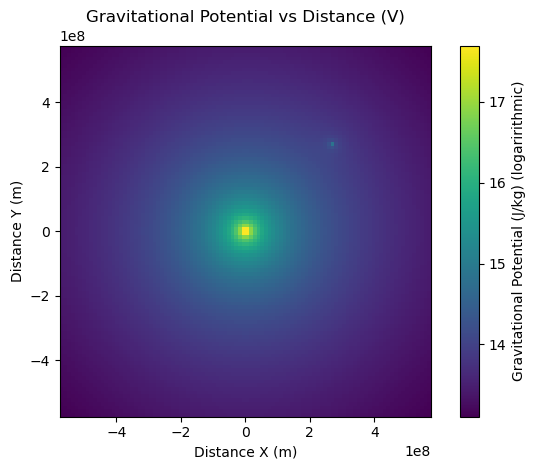

In [3]:
def grav_moon(xm, ym, x,y):
   d = (3.8e8)
   xe = d/np.sqrt(2) 
   ye = d/np.sqrt(2)
   re = np.sqrt((xm - x)**2 +(ym-y)**2)  
   rm = np.sqrt((xe - x)**2 +(ye-y)**2) 
   G = 6.67e-11
   M = 5.9e24
   m = 7.3e22 
   Pm = (-(G*M)/re)+(-(G*m)/rm) #include moon
   Pot = np.where((re==0)|(rm==0), np.nan, Pm)
   return Pot 

   
x_grid = np.linspace(-1.5*d, 1.5*d, 100)
y_grid = np.linspace(-1.5*d, 1.5*d, 100)
X, Y = np.meshgrid(x_grid,y_grid)

values2 = np.abs(grav_moon(0,0, X, Y)) 

fig, ax2 = plt.subplots()
mesh = ax2.pcolormesh(X,Y,np.log(values2))

ax2.set_xlabel("Distance X (m)")
ax2.set_aspect("equal")
cbar = fig.colorbar(mesh)

cbar.set_label("Gravitational Potential (J/kg) (logaririthmic)")
ax2.set_ylabel("Distance Y (m)")
ax2.set_title("Gravitational Potential vs Distance (V)")
fig.tight_layout()

C:\Users\talya\AppData\Local\Temp\ipykernel_9200\2588574979.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(mesh)


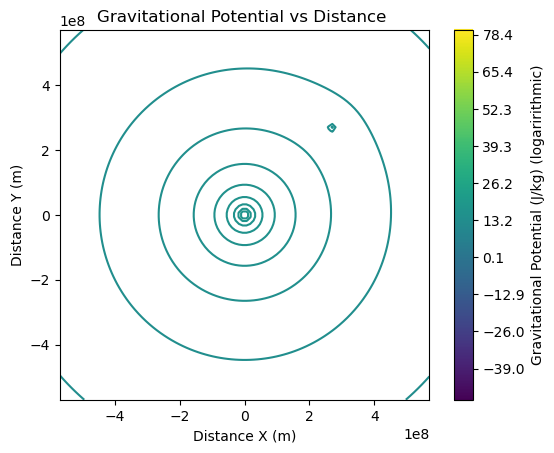

In [4]:
fig_contour, ax_contours = plt. subplots(1,1)
lvl = np.linspace(-50, 80, 250)
mesh = ax_contours.contour(X, Y, np.log(values2), levels=lvl)
ax_contours.set_aspect("equal")

ax_contours.set_xlabel("Distance X (m)")
ax_contours.set_aspect("equal")

cbar = fig.colorbar(mesh)

cbar.set_label("Gravitational Potential (J/kg) (logaririthmic)")
ax_contours.set_ylabel("Distance Y (m)")
ax_contours.set_title("Gravitational Potential vs Distance ")
fig.tight_layout()

**Part 3**

Text(0.5, 1.0, 'Gravitational Force vs Distance')

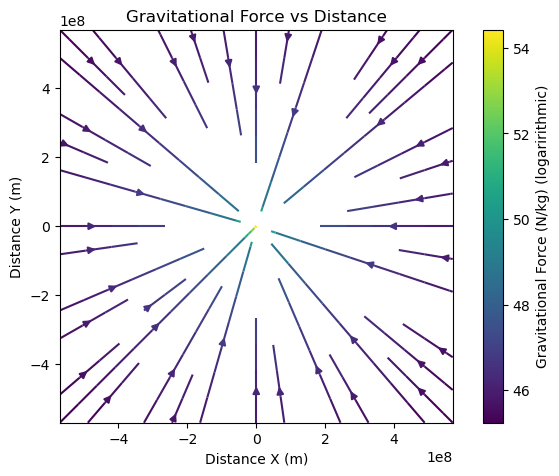

In [5]:
d = (3.8e8)
G = 6.67e-11
M = 5.9e24
m = 7.3e22 
def Force(M1, m2, x1, y1, x2, y2):
    G = 6.67e-11
    r = np.sqrt((x1-x2)**2+(y1-y2)**2)
    Fx = (-G*M1*m2)*((x2-x1))/(r**3)
    Fy = (-G*M1*m2)*((y2-y1))/(r**3)
    Fx1 = np.where((x2-x1)==0, np.nan, Fx)
    Fy1 = np.where((y2-y1)==0, np.nan, Fy)
    return Fx1, Fy1

fig, ax_stream = plt.subplots(1,1)

x_grid = np.linspace(-1.5*d, 1.5*d, 100)
y_grid = np.linspace(-1.5*d, 1.5*d, 100)


X, Y = np.meshgrid(x_grid,y_grid)

xvalues, yvalues = Force(M, m, 0, 0, X, Y)
colors = np.log(np.hypot(xvalues,yvalues))
mesh = ax_stream.streamplot(X, Y, xvalues, yvalues, density=0.5, color=colors)


ax_stream.set_aspect("equal")
cbar = fig.colorbar(mesh.lines)

fig.tight_layout()

cbar.set_label("Gravitational Force (N/kg) (logaririthmic)")
ax_stream.set_ylabel("Distance Y (m)")
ax_stream.set_xlabel("Distance X (m)")
ax_stream.set_title("Gravitational Force vs Distance")

**Part 4**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

def V(t, m0, mf, ve, g, m_dot):
    if m0 - m_dot*t <= mf + 1e-6:
        return 0
    return ve*np.log(m0/(m0-m_dot*t))-g*t

    #m0 = 2.4e6 #wet mass
    #mf = 7.5e5 # final mass
    #ve = 2.4e3 #fuel exhaust velocity
    #g = 9.81 #gravitational acceleration
    # h is burn out
    # T is the total burn time
    #m = 1.3e4 #fuel burn rate

T = (2.4e6 - 7.5e5)/1.3e4
print("Burn Time", T)

altitude, err = quad(V, 0, T, args=(2.4e6, 7.5e5, 2.4e3, 9.81, 1.3e4))
print("Altitude", altitude)

Burn Time 126.92307692307692
Altitude 64546.796157083234
